In [ ]:
!pip install praw
!pip install sqlite3-api

     |████████████████████████████████| 153kB 2.7MB/s 
     |████████████████████████████████| 204kB 8.0MB/s 
  Created wheel for sqlite3-api: filename=sqlite3_api-1.0.5-cp36-none-any.whl size=9252 sha256=fc4fc5fb3df3830ba3546d079eb157e832190140f67b9afa802d251603aeca3a
  Stored in directory: /root/.cache/pip/wheels/ba/29/a6/7df2a4d9785a2850b0ae7f681c36fe0bea7abb9f0d0ebd80cb
Successfully built sqlite3-api


In [ ]:
import praw
import nltk
import random
import sqlite3
import matplotlib.pyplot as plt
from collections import OrderedDict

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
conn = sqlite3.connect('reddit.db')
c = conn.cursor()

In [ ]:
c.execute('''DROP TABLE IF EXISTS topics''')
c.execute('''DROP TABLE IF EXISTS comments''')
c.execute('''CREATE TABLE topics (topicTitle text, topicText text, topicID text, topicCategory text)''')
c.execute('''CREATE TABLE comments (commentText text, commentID text, topicTitle text, topicText text, topicID text, topicCategory text)''')

In [ ]:
user_agent = "com.sayan.personal"
r = praw.Reddit(client_id="8FlIx6rbsfBRTQ",  
                client_secret="z7WW_vP75QGNoez_d2ecTtLBRRs",
                user_agent=user_agent)
subreddits = ['datascience', 'gameofthrones']
limit = 1000

In [ ]:
def praw_get_data(limit, subreddit_name):
  topics = r.subreddit(subreddit_name).hot(limit=limit)
  comment_insert = []
  topic_insert = []
  topic_NBR = 1
  for topic in topics:
    if (topic_NBR/limit)*100 in range (1, 100):
      print(f'TOPIC: {topic.id} complete: {(topic_NBR/limit)*100}')
    topic_NBR += 1
    try:
      topic_insert.append((topic.title, topic.selftext, 
                          topic.id, subreddit_name))
    except:
      pass
    
    try:
      for topic in topic.comments:
        comment_insert.append((comment.body, comment.id,
                              topic.title, topic.selftext, 
                              topic.id, subreddit_name))
    except:
      pass
  print('************')
  print('Inserting data into SQLite')
  c.executemany('INSERT INTO topics VALUES (?, ?, ?, ?)', topic_insert)
  print('Inserted topics.')
  c.executemany('INSERT INTO comments VALUES (?, ?, ?, ?, ?, ?)', comment_insert)
  print('Inserted comments')
  conn.commit()

In [ ]:
for subject in subreddits:
  praw_get_data(limit=limit, subreddit_name=subject)

TOPIC: hvc6qs complete: 1.0
TOPIC: huxsto complete: 2.0
TOPIC: huop3m complete: 3.0
TOPIC: hu84wo complete: 4.0
TOPIC: htgon3 complete: 5.0
TOPIC: hsx70c complete: 6.0
TOPIC: hrr9q9 complete: 8.0
TOPIC: hr857i complete: 9.0
TOPIC: hqflt3 complete: 10.0
TOPIC: hpf2zb complete: 11.0
TOPIC: hoqz1y complete: 12.0
TOPIC: hnam46 complete: 13.0
TOPIC: hme3mt complete: 15.0
TOPIC: hl4crd complete: 16.0
TOPIC: hl7oxd complete: 17.0
TOPIC: hkdcw3 complete: 18.0
TOPIC: hk0ff3 complete: 19.0
TOPIC: hj9kg7 complete: 20.0
TOPIC: himwch complete: 21.0
TOPIC: hiimdx complete: 22.0
TOPIC: hhhkiq complete: 23.0
TOPIC: hg4fzc complete: 24.0
TOPIC: hg2ljy complete: 25.0
TOPIC: hfcin7 complete: 26.0
TOPIC: hei7ho complete: 27.0
TOPIC: hd7b4j complete: 30.0
TOPIC: hcit68 complete: 31.0
TOPIC: hbbcxa complete: 32.0
TOPIC: haojt0 complete: 33.0
TOPIC: ha6hmz complete: 34.0
TOPIC: h96e3t complete: 35.0
TOPIC: h883pd complete: 36.0
TOPIC: h14ies complete: 37.0
TOPIC: gzvvco complete: 38.0
TOPIC: gzd84g complete

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def word_filter(excluded, word_row):
  filtered = [word for word in word_row if word not in excluded]
  return filtered

def lowercase_array(word_row):
  lowercased = [word.lower() for word in word_row]
  return lowercased

In [ ]:
conn = sqlite3.connect('reddit.db')
c = conn.cursor()

In [ ]:
def data_processing(sql):
  c.execute(sql)
  data = {'word_matrix': [], 'all_words': []}
  row = c.fetchone()
  while row is not None:
    word_row = nltk.tokenize.word_tokenize(row[0] + " " + row[1])    
    word_row_lowercased = lowercase_array(word_row)
    word_row_nonstopwords = word_filter(stopwords, word_row_lowercased)
    data['all_words'].extend(word_row_nonstopwords)
    data['word_matrix'].append(word_row_nonstopwords)
    row = c.fetchone()
  return data

In [ ]:
subreddits = ['datascience', 'gameofthrones']
data = {}
for subject in subreddits:
  data[subject] = data_processing(sql='''SELECT topicTitle, topicText, topicCategory from topics WHERE topicCategory = ''' + "'" + subject + "'")

In [ ]:
print(data['datascience']['word_matrix'][0])

['weekly', 'entering', '&', 'transitioning', 'thread', '|', '19', 'jul', '2020', '-', '26', 'jul', '2020', 'welcome', 'week', "'s", 'entering', '&', 'transitioning', 'thread', '!', 'thread', 'questions', 'getting', 'started', ',', 'studying', ',', 'transitioning', 'data', 'science', 'field', '.', 'topics', 'include', ':', '*', 'learning', 'resources', '(', 'e.g', '.', 'books', ',', 'tutorials', ',', 'videos', ')', '*', 'traditional', 'education', '(', 'e.g', '.', 'schools', ',', 'degrees', ',', 'electives', ')', '*', 'alternative', 'education', '(', 'e.g', '.', 'online', 'courses', ',', 'bootcamps', ')', '*', 'job', 'search', 'questions', '(', 'e.g', '.', 'resumes', ',', 'applying', ',', 'career', 'prospects', ')', '*', 'elementary', 'questions', '(', 'e.g', '.', 'start', ',', 'next', ')', 'wait', 'answers', 'community', ',', 'check', '[', 'faq', ']', '(', 'https', ':', '//www.reddit.com/r/datascience/wiki/frequently-asked-questions', ')', '[', 'resources', ']', '(', 'resources', ')', 

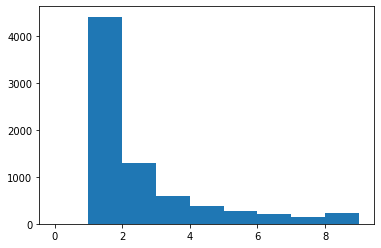

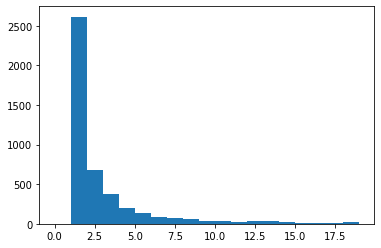

In [ ]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

In [ ]:
print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

['equal', 'durations', 'ft', 'retard', 'theoretically', 'shot', 'lenders', 'rf', 'industrial', 'cpg', 'shipping', 'trailers', 'lacked', 'centric', 'arduino', '/machine', '//www.udemy.com/course/machine-learning-course-with-python/', 'utm_source=adwords', 'utm_medium=udemyads', 'utm_campaign=python_v.prof_la.en_cc.row_ti.7380', 'utm_content=deal4584', 'utm_term=_._ag_85724077824_._ad_437497333677_._kw__._de_m_._dm__._pl__._ti_dsa-774930031889_._li_9073643_._pd__._', 'matchtype=b', 'gclid=cj0kcqjw9b_4brcmarisadmuiyo5bmedqnkv9qrtcxua9zh50ilno-madex-b42ce-rtd_jr4iyqjb0aaghiealw_wcb', 'persist_locale=', 'locale=en_us', 'attempt', 'on/for', 'teams/companies', 'overinflated', 'perception', 'corporations', 'non-profits', 'wasted', 'time/energy', 'not-very-technical', 'dollars/man-hours', 'outset', 'overpromise', 'underperform', 'ambiguous', 'bs', 'bat', 'overruled', 'spilled', 'thru', 'prevailed', 'role/focus/specialization', 'uiuc', 'pertaining', 'boards', 'obtuse', 'workable', 'typeform', 'r

In [ ]:
print(wordfreqs_cat1.most_common(20))
print(wordfreqs_cat2.most_common(20))

[('.', 3764), (',', 3670), ('data', 1436), ('?', 1342), (')', 1089), ('(', 1022), (':', 651), ('science', 460), ("'m", 414), ("n't", 382), ('like', 377), ("'s", 367), ('would', 363), ('work', 360), ('’', 358), ("''", 281), ('``', 274), ('!', 251), ('time', 251), ('[', 247)]
[('.', 1502), (',', 1112), ('[', 602), (']', 602), ('spoilers', 561), ('?', 413), ('’', 279), (')', 239), ("'s", 238), ('(', 227), ('season', 218), (':', 201), ('would', 172), ('show', 164), ('jon', 159), ('king', 141), ('game', 137), ("n't", 133), ('thrones', 127), ('one', 126)]


In [ ]:
stemmer = nltk.SnowballStemmer('english')

def word_stemmer(word_row):
  stemmed = [stemmer.stem(word) for word in word_row]
  return stemmed

In [ ]:
manual_stopwords = [',', '.', '(', ')', '?', ':', '[', ']', '’', "''", '``',
                    '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
                    "'m", "n't", "'s", '&', '%', '*', '...', '-', ';', '--'
                    '"', "'", '|', '/'
                    ]

def data_processing(sql):
  c.execute(sql)
  data = {'word_matrix': [], 'all_words': []}
  row = c.fetchone()
  while row is not None:
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|[^\w\s]+')
    word_row = tokenizer.tokenize(row[0] + " " + row[1])    
    word_row_lowercased = lowercase_array(word_row)
    word_row_nonstopwords = word_filter(stopwords, word_row_lowercased)
    word_row_nonstopwords = word_filter(manual_stopwords, word_row_nonstopwords)
    word_row_stemmed = word_stemmer(word_row_nonstopwords)

    data['all_words'].extend(word_row_stemmed)
    data['word_matrix'].append(word_row_stemmed)
    row = c.fetchone()
  return data

In [ ]:
subreddits = ['datascience', 'gameofthrones']
data = {}
for subject in subreddits:
  data[subject] = data_processing(sql='''SELECT topicTitle, topicText, topicCategory from topics WHERE topicCategory = ''' + "'" + subject + "'")

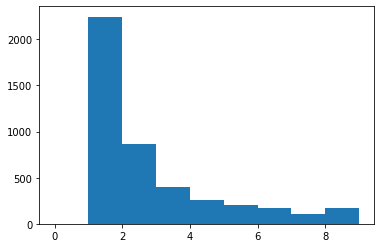

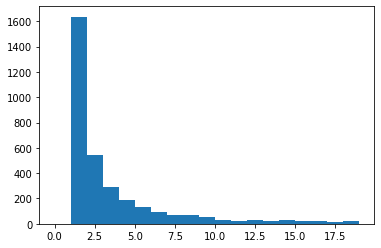

In [ ]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

In [ ]:
print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

['durat', 'ft', 'retard', 'lender', 'rf', 'cpg', 'trailer', '(%', 'centric', 'arduino', 'udemyad', 'utm_campaign', 'python_v', 'prof_la', 'en_cc', 'row_ti', '7380', 'utm_cont', 'deal4584', 'utm_term', '_ag_85724077824_', '_ad_437497333677_', '_kw__', '_de_m_', '_dm__', '_pl__', '_ti_dsa', '774930031889_', '_li_9073643_', '_pd__', 'matchtyp', 'gclid', 'cj0kcqjw9b_4brcmarisadmuiyo5bmedqnkv9qrtcxua9zh50ilno', 'madex', 'b42ce', 'rtd_jr4iyqjb0aaghiealw_wcb', 'persist_local', 'en_us', 'overinfl', 'outset', 'overpromis', 'underperform', 'ambigu', 'bat', 'overrul', 'spill', 'thru', 'prevail', 'uiuc', 'obtus', 'workabl', 'typeform', 'rec', 'kurzgasagt', 'nj', '1tb', '180', '1080', 'outag', 'solder', 'seal', 'conductor', 'nav', 'catastroph', 'lander', 'rstat', '/“', 'declin', 'depict', 'angl', 'pronounc', 'brake', 'skinni', 'v', 'precursor', 'indulg', 'downward', 'coincid', 'bookstor', 'prestig', 'persever', 'drool', 'wherebi', 'leaf', 'node', 'catboost', 'ala', 'ensembl', '451', '405', 'excess'

In [ ]:
print(wordfreqs_cat1.most_common(20))
print(wordfreqs_cat2.most_common(20))

[('data', 1483), ('work', 608), ('use', 560), ('scienc', 483), ('like', 420), ('"', 391), ('model', 362), ('would', 354), ('get', 335), ('learn', 332), ('time', 309), ('job', 286), ('compani', 279), ('project', 253), ('know', 249), ('scientist', 242), ('want', 234), ('question', 221), ('one', 215), ('need', 208)]
[('spoiler', 573), ('season', 262), ('show', 184), ('throne', 170), ('king', 166), ('would', 164), ('jon', 162), ('game', 144), ('like', 137), ('one', 132), ('think', 128), ('watch', 125), ('got', 121), ('book', 120), ('poll', 119), ('time', 104), ('end', 102), ('episod', 96), ('charact', 91), ('battl', 90)]


In [ ]:
holdout_len = 100

labeled_data1 = [(word, 'datascience') for word in data['datascience']['word_matrix'][holdout_len:]]
labeled_data2 = [(word, 'gameofthrones') for word in data['gameofthrones']['word_matrix'][holdout_len:]]

labeled_data = [*labeled_data1, *labeled_data2]

In [ ]:
holdout_data1 = [(word, 'datascience') for word in data['datascience']['word_matrix'][:holdout_len]]
holdout_data2 = [(word, 'gameofthrones') for word in data['gameofthrones']['word_matrix'][:holdout_len]]

holdout_data = [*holdout_data1, *holdout_data2]
holdout_data_labels = ([('datascience') for _ in range (holdout_len)] + [('gameofthrones') for _ in range (holdout_len)])

In [ ]:
data['datascience']['all_words_dedup'] = list(OrderedDict.fromkeys(data['datascience']['all_words']))
data['gameofthrones']['all_words_dedup'] = list(OrderedDict.fromkeys(data['gameofthrones']['all_words']))

In [ ]:
all_words = [*data['datascience']['all_words_dedup'], *data['gameofthrones']['all_words_dedup']]
all_words_dedup = list(OrderedDict.fromkeys(all_words))

In [ ]:
prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in holdout_data]

In [71]:
# prepared_data

In [ ]:
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.75)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

In [ ]:
classifier  = nltk.NaiveBayesClassifier.train(train)
nltk.classify.accuracy(classifier, test)

0.9512195121951219

In [72]:
# prepared_holdout_data[:3]

In [ ]:
classified_data = [classifier.classify(holdout_data[0]) for holdout_data in prepared_holdout_data]
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print(cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience | <92>  8 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [ ]:
print(classifier.show_most_informative_features(20))

Most Informative Features
               scientist = True           datasc : gameof =     57.1 : 1.0
                 project = True           datasc : gameof =     49.3 : 1.0
                   learn = True           datasc : gameof =     41.3 : 1.0
                  season = True           gameof : datasc =     33.2 : 1.0
                     job = True           datasc : gameof =     30.6 : 1.0
                   field = True           datasc : gameof =     25.9 : 1.0
                 compani = True           datasc : gameof =     25.6 : 1.0
                  experi = True           datasc : gameof =     24.6 : 1.0
                 process = True           datasc : gameof =     24.3 : 1.0
                 product = True           datasc : gameof =     24.3 : 1.0
                   appli = True           datasc : gameof =     23.1 : 1.0
                   skill = True           datasc : gameof =     22.6 : 1.0
                    role = True           datasc : gameof =     22.0 : 1.0

In [ ]:
classifier2  = nltk.DecisionTreeClassifier.train(train)
nltk.classify.accuracy(classifier2, test)

1.0

In [ ]:
classified_data2 = [classifier2.classify(holdout_data[0]) for holdout_data in prepared_holdout_data]
cm2 = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)
print(cm2)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |<100>  . |
gameofthrones |   1 <99>|
--------------+---------+
(row = reference; col = test)



In [ ]:
print(classifier2.pseudocode(depth=4))

if spoiler == False: return 'datascience'
if spoiler == True: return 'gameofthrones'

